In [68]:
import pandas as pd
import numpy as np

In [69]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)

In [70]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [71]:
# for autoreload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
from analyzer import HelperAnalyzer, AnalyzerPrediction
from statistic import Statistic
from utils import UtilsKy

In [73]:
UtilsKy.DB_TEACH_KYW3

'/mnt/files/workdata/work/merchants/merchant_33_kyw3_2020-06-05/04_experiments/ex_01_some_teach/db_teach_2_digit_status_kyw3_from_2019-11-20_to_2020-03-13.csv'

In [74]:
UtilsKy.DB_TEST_KYW3

'/mnt/files/workdata/work/merchants/merchant_33_kyw3_2020-06-05/04_experiments/ex_01_some_teach/db_test_2_digit_status_kyw3a_from_2020-04-06_to_2020-05-06.csv'

In [75]:
# kyw3
db_teach = pd.read_csv(UtilsKy.DB_TEACH_KYW3, dtype=str, encoding='cp1251')
db_test = pd.read_csv(UtilsKy.DB_TEST_KYW3 , dtype=str, encoding='cp1251')

In [76]:
# DataFrame.corr(method='pearson', min_periods=1) {‘pearson’, ‘kendall’, ‘spearman’}

In [77]:
one_factor_cor = Statistic.get_correlation_summarise(db_teach, db_test, 'amount')

In [78]:
one_factor_cor

,p_x,p_y
p_x,1.000000,0.329933
p_y,0.329933,1.000000


In [79]:
drop_columns = ['id', 'order_id']
db_teach.drop(columns=drop_columns, inplace=True)
db_test.drop(columns=drop_columns, inplace=True)

In [80]:
db_teach.head()

,amount,amount_deviation,bank_currency,bin,city,count_months_to_end_card,day_of_week,gender2,hour,is_city_resolved,is_gender_undefined,latitude,longitude,phone_2_norm,status
0,1.00,-3,112,547087,Stuttgart,29,3,undefined,09,1,1,48.7667,9.1833,55,0
1,25.00,-2,840,517148,Kapaa,41,3,f,12,1,0,22.0837,-159.3553,08,0
2,21.18,-2,840,546540,undefined,44,3,m,15,0,0,38.0000,-97.0000,40,0
3,200.00,2,840,510805,Oakland,40,3,m,15,1,0,37.8116,-122.2420,10,0
4,2.38,-3,76,544731,Rio De Janeiro,80,3,undefined,15,1,1,-22.9000,-43.2333,19,0


In [81]:
full_correlation_statistic = Statistic.get_correlation_summarise_all_factors(db_teach, db_test, method='kendall')
full_correlation_statistic

,name,value
0,amount,0.329933
1,amount_deviation,0.606061
2,bank_currency,0.131762
3,bin,0.237723
4,city,0.118343
5,count_months_to_end_card,0.114433
6,day_of_week,0.428571
7,gender2,0.333333
8,hour,0.260870
9,is_city_resolved,1.000000


In [82]:
full_correlation_statistic = Statistic.get_correlation_summarise_all_factors(db_teach, db_test, method='pearson')
full_correlation_statistic

,name,value
0,amount,0.284635
1,amount_deviation,0.857368
2,bank_currency,0.063717
3,bin,0.187630
4,city,0.084629
5,count_months_to_end_card,0.229016
6,day_of_week,0.494730
7,gender2,0.447106
8,hour,0.521532
9,is_city_resolved,1.000000


In [83]:
full_correlation_statistic = Statistic.get_correlation_summarise_all_factors(db_teach, db_test, method='spearman')
full_correlation_statistic

,name,value
0,amount,0.351991
1,amount_deviation,0.776224
2,bank_currency,0.149438
3,bin,0.257822
4,city,0.126663
5,count_months_to_end_card,0.134981
6,day_of_week,0.571429
7,gender2,0.500000
8,hour,0.383478
9,is_city_resolved,1.000000


In [84]:
db_teach.longitude = db_teach.longitude.apply(lambda x: 0 if x == 'undefined' else x)
db_teach.latitude = db_teach.latitude.apply(lambda x: 0 if x == 'undefined' else x)

In [85]:
col_names = ['longitude', 'latitude', 'amount', 'amount_deviation', 'status']
db_teach[col_names] = db_teach[col_names].astype(np.float)

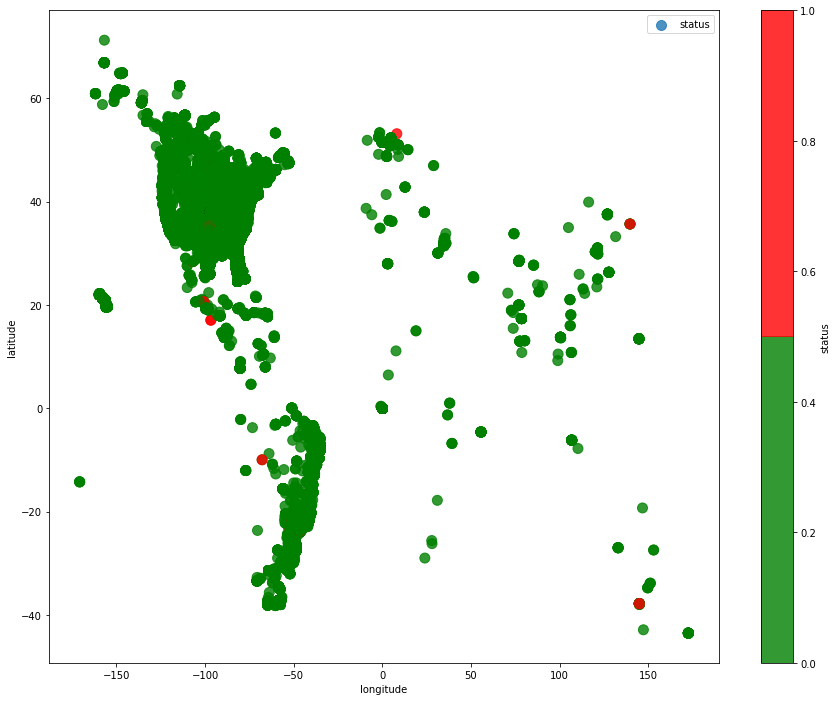

In [87]:
from matplotlib import colors
from matplotlib import pyplot as plt
mycmap = colors.ListedColormap(['green', 'red'])
db_teach.plot(kind="scatter", x="longitude", y="latitude", alpha=0.8,
    s=100, label="status", figsize=(15,12),
    c="status", colorbar=True, cmap=mycmap,
    sharex=False) # plt.get_cmap("Accent")
plt.legend()

In [88]:
from decomposition_pca.encode_strategy import Encode

In [89]:
COL_FACTORS = ['amount_deviation', 'bank_currency', 'bin', 'city', 'count_months_to_end_card', 'day_of_week', 'gender2', 'hour', 'is_city_resolved', 
                'is_gender_undefined', 'latitude', 'longitude',  'phone_2_norm',]

In [90]:
db_teach[COL_FACTORS] = db_teach[COL_FACTORS].astype(np.str)
db_test[COL_FACTORS] = db_test[COL_FACTORS].astype(np.str)

In [91]:
is_factor_encode = True
for col in COL_FACTORS:
    if is_factor_encode:
        col_name = col
        col_enc_name = 'enc_' + col_name
        print("col_enc_name={}" . format(col_enc_name))
        ret_val = Encode().ordered_target_st(db_teach, db_test, col)
        db_teach[col_enc_name] =  ret_val.get('encode_teach')

col_enc_name=enc_amount_deviation
col_enc_name=enc_bank_currency
col_enc_name=enc_bin
col_enc_name=enc_city
col_enc_name=enc_count_months_to_end_card
col_enc_name=enc_day_of_week
col_enc_name=enc_gender2
col_enc_name=enc_hour
col_enc_name=enc_is_city_resolved
col_enc_name=enc_is_gender_undefined
col_enc_name=enc_latitude
col_enc_name=enc_longitude
col_enc_name=enc_phone_2_norm


In [92]:
db_teach.status = db_teach.status.astype(np.float)
db_teach.amount = db_teach.amount.astype(np.float)

In [93]:
ENC_COLS = ['enc_amount_deviation', 'enc_bank_currency', 'enc_bin', 'enc_city', 'enc_count_months_to_end_card', 'enc_day_of_week', 'enc_gender2', 
            'enc_hour', 'enc_is_city_resolved', 'enc_is_gender_undefined', 'enc_phone_2_norm', 'amount', 'status', 'enc_latitude', 'enc_longitude']
# add amount, status

In [94]:
corr_matrix = db_teach[ENC_COLS].corr()

In [95]:
corr_matrix

,enc_amount_deviation,enc_bank_currency,enc_bin,enc_city,enc_count_months_to_end_card,enc_day_of_week,enc_gender2,enc_hour,enc_is_city_resolved,enc_is_gender_undefined,enc_phone_2_norm,amount,status,enc_latitude,enc_longitude
enc_amount_deviation,1.000000,0.139854,0.065242,0.029131,0.041693,0.164580,0.093032,0.092899,0.169427,0.176522,0.038344,0.667543,0.049840,0.028213,0.028660
enc_bank_currency,0.139854,1.000000,0.159122,0.051813,0.104069,0.227523,0.153781,0.144383,0.271733,0.227159,0.070154,0.009996,0.038545,0.053280,0.053146
enc_bin,0.065242,0.159122,1.000000,0.074712,0.054172,0.041244,0.026237,0.028160,0.046384,0.036267,0.065373,0.042995,0.193828,0.080684,0.081001
enc_city,0.029131,0.051813,0.074712,1.000000,0.041526,0.025971,0.034100,0.020724,0.095948,0.037465,0.083174,0.008330,0.207434,0.691130,0.702082
enc_count_months_to_end_card,0.041693,0.104069,0.054172,0.041526,1.000000,0.084242,0.060920,0.055353,0.099879,0.097402,0.043334,-0.002231,0.053134,0.041473,0.042092
enc_day_of_week,0.164580,0.227523,0.041244,0.025971,0.084242,1.000000,0.222343,0.248229,0.374214,0.350916,0.066207,0.018922,0.018281,0.021286,0.021057
enc_gender2,0.093032,0.153781,0.026237,0.034100,0.060920,0.222343,1.000000,0.153125,0.237149,0.622130,0.056996,-0.007960,0.027623,0.029544,0.030699
enc_hour,0.092899,0.144383,0.028160,0.020724,0.055353,0.248229,0.153125,1.000000,0.226451,0.214578,0.045892,0.002252,0.026980,0.017263,0.017322
enc_is_city_resolved,0.169427,0.271733,0.046384,0.095948,0.099879,0.374214,0.237149,0.226451,1.000000,0.394482,0.079787,0.003179,0.021644,0.084487,0.083764
enc_is_gender_undefined,0.176522,0.227159,0.036267,0.037465,0.097402,0.350916,0.622130,0.214578,0.394482,1.000000,0.082177,0.030690,0.022784,0.034222,0.034089


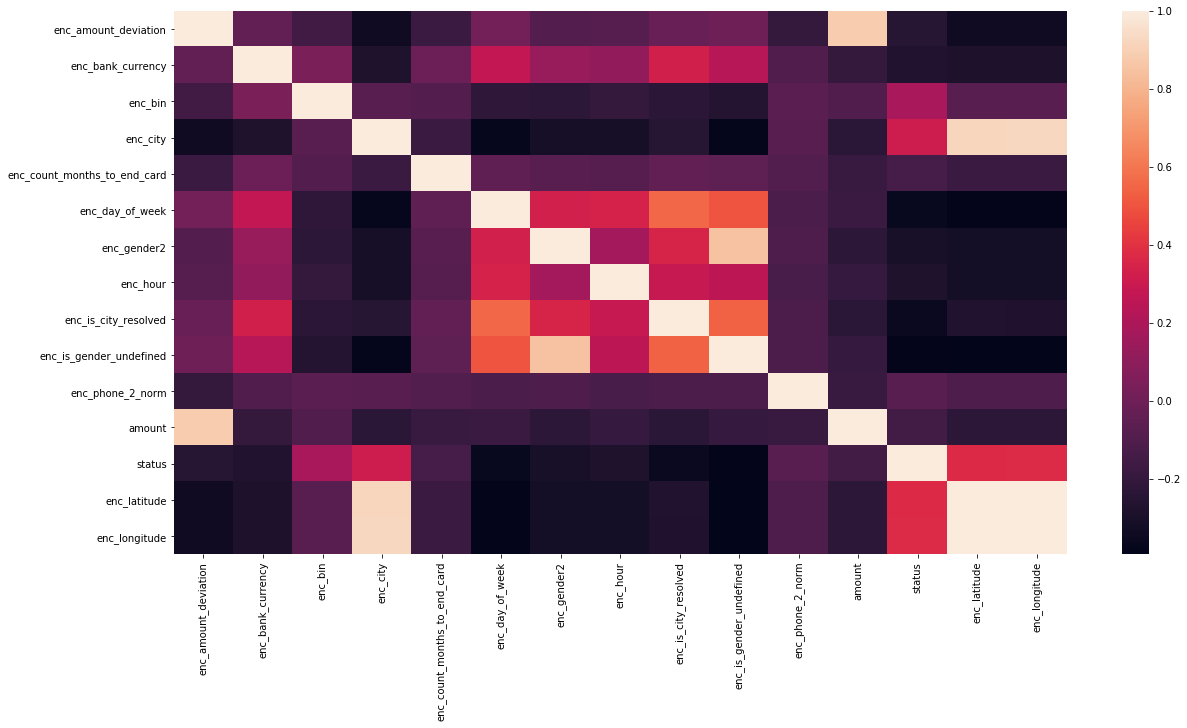

In [96]:
import seaborn as sns
plt.figure(figsize=(20,10))
c= corr_matrix.corr()
sns.heatmap(c)

In [97]:
corr_matrix["status"].sort_values(ascending=False)

status                          1.000000
enc_longitude                   0.277681
enc_latitude                    0.275154
enc_city                        0.207434
enc_bin                         0.193828
enc_phone_2_norm                0.071221
enc_count_months_to_end_card    0.053134
enc_amount_deviation            0.049840
amount                          0.040848
enc_bank_currency               0.038545
enc_gender2                     0.027623
enc_hour                        0.026980
enc_is_gender_undefined         0.022784
enc_is_city_resolved            0.021644
enc_day_of_week                 0.018281
Name: status, dtype: float64

In [ ]:
# Test research

In [110]:
# Codding db_test exacly db_teach

is_factor_encode = True
for col in COL_FACTORS:
    if is_factor_encode:
        col_name = col
        col_enc_name = 'enc_' + col_name
        print("col_enc_name={}" . format(col_enc_name))
        ret_val = Encode().ordered_target_st(db_test, db_test, col)
        db_test[col_enc_name] =  ret_val.get('encode_teach')

col_enc_name=enc_amount_deviation
col_enc_name=enc_bank_currency
col_enc_name=enc_bin
col_enc_name=enc_city
col_enc_name=enc_count_months_to_end_card
col_enc_name=enc_day_of_week
col_enc_name=enc_gender2
col_enc_name=enc_hour
col_enc_name=enc_is_city_resolved
col_enc_name=enc_is_gender_undefined
col_enc_name=enc_latitude
col_enc_name=enc_longitude
col_enc_name=enc_phone_2_norm


In [105]:
db_test.status = db_test.status.astype(np.float)
db_test.amount = db_test.amount.astype(np.float)

In [111]:
db_test.enc_amount_deviation.head()

0    0.006413
1    0.006413
2    0.004276
3    0.006413
4    0.004276
Name: enc_amount_deviation, dtype: float64

In [112]:
corr_matrix_test = db_test[ENC_COLS].corr()

In [113]:
corr_matrix_test

,enc_amount_deviation,enc_bank_currency,enc_bin,enc_city,enc_count_months_to_end_card,enc_day_of_week,enc_gender2,enc_hour,enc_is_city_resolved,enc_is_gender_undefined,enc_phone_2_norm,amount,status,enc_latitude,enc_longitude
enc_amount_deviation,1.000000,0.128929,0.063937,0.029611,0.028901,0.129917,0.114991,0.054278,0.132623,0.127666,0.041179,0.623876,0.065940,0.026845,0.027269
enc_bank_currency,0.128929,1.000000,0.276926,0.022974,0.035653,0.175688,0.173237,0.086402,0.218684,0.176319,0.081498,0.078111,0.048338,0.027945,0.027997
enc_bin,0.063937,0.276926,1.000000,0.092906,0.073794,0.041952,0.051336,0.032084,0.048610,0.052881,0.071203,0.057660,0.208640,0.110317,0.110684
enc_city,0.029611,0.022974,0.092906,1.000000,0.049504,0.012766,0.026934,0.004653,0.082932,0.025356,0.070333,0.014405,0.291243,0.723800,0.723558
enc_count_months_to_end_card,0.028901,0.035653,0.073794,0.049504,1.000000,0.026901,0.058589,0.027494,0.060329,0.062613,0.039594,0.011887,0.073062,0.057806,0.056300
enc_day_of_week,0.129917,0.175688,0.041952,0.012766,0.026901,1.000000,0.275561,0.209778,0.315854,0.280982,0.051137,-0.002951,0.013157,0.016524,0.016564
enc_gender2,0.114991,0.173237,0.051336,0.026934,0.058589,0.275561,1.000000,0.132237,0.242714,0.959527,0.056876,-0.010874,0.018987,0.023851,0.024320
enc_hour,0.054278,0.086402,0.032084,0.004653,0.027494,0.209778,0.132237,1.000000,0.156468,0.137622,0.027539,-0.018197,0.019627,0.005931,0.005695
enc_is_city_resolved,0.132623,0.218684,0.048610,0.082932,0.060329,0.315854,0.242714,0.156468,1.000000,0.249090,0.070085,-0.027853,0.015020,0.081904,0.081750
enc_is_gender_undefined,0.127666,0.176319,0.052881,0.025356,0.062613,0.280982,0.959527,0.137622,0.249090,1.000000,0.058712,-0.001834,0.019102,0.022433,0.022583


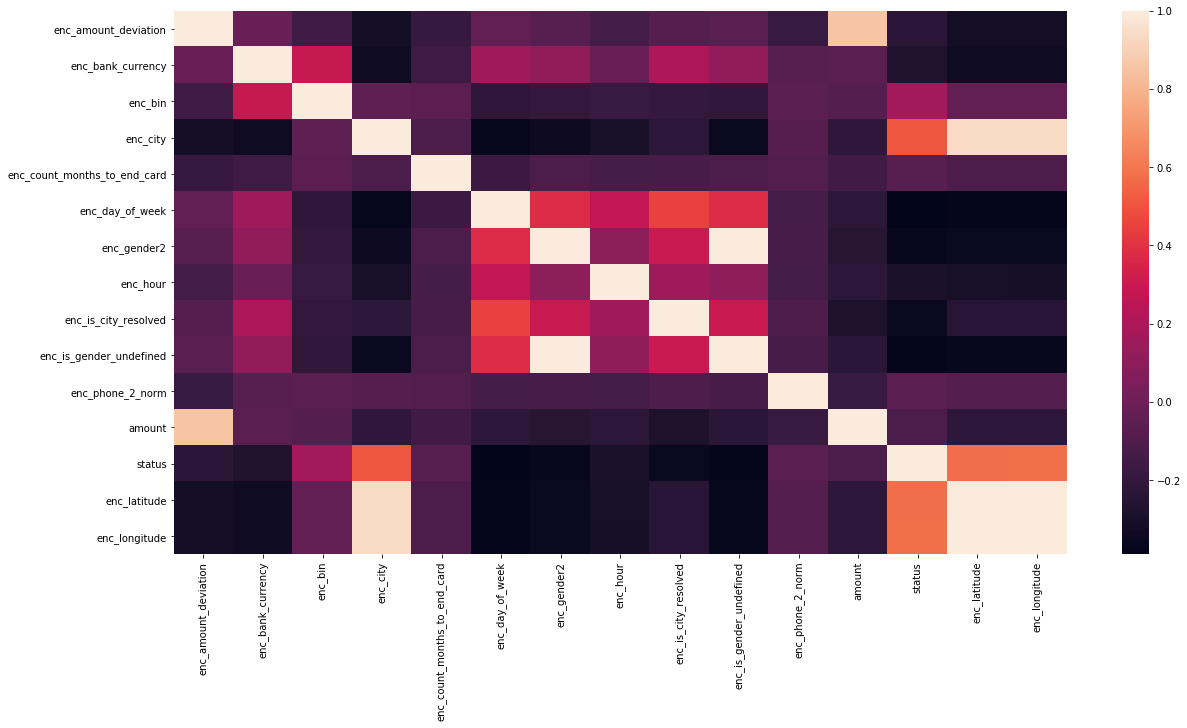

In [114]:
plt.figure(figsize=(20,10))
c= corr_matrix_test.corr()
sns.heatmap(c)

In [115]:
corr_matrix_test["status"].sort_values(ascending=False)

status                          1.000000
enc_longitude                   0.391146
enc_latitude                    0.386117
enc_city                        0.291243
enc_bin                         0.208640
enc_phone_2_norm                0.081106
enc_count_months_to_end_card    0.073062
enc_amount_deviation            0.065940
amount                          0.064481
enc_bank_currency               0.048338
enc_hour                        0.019627
enc_is_gender_undefined         0.019102
enc_gender2                     0.018987
enc_is_city_resolved            0.015020
enc_day_of_week                 0.013157
Name: status, dtype: float64